In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('nifty_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
0,2022-10-03 00:00:00+05:30,17102.099609,17114.650391,16855.550781,16887.349609,278400,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
1,2022-10-04 00:00:00+05:30,17147.449219,17287.300781,17117.300781,17274.300781,226000,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
2,2022-10-06 00:00:00+05:30,17379.250000,17428.800781,17315.650391,17331.800781,265500,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
3,2022-10-07 00:00:00+05:30,17287.199219,17337.349609,17216.949219,17314.650391,216300,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
4,2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,234000,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.dayofweek

In [5]:
df['Timestamp'] = df['Date'].apply(lambda x: x.timestamp())

In [6]:
df = df.drop(columns = ['Date', 'Dividends', 'Stock Splits'])
df.head()

,Open,High,Low,Close,Volume,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average,Day,Month,Year,Week,Timestamp
0,17102.099609,17114.650391,16855.550781,16887.349609,278400,25810.85,26277.35,18837.85,25006.428,23077.352,3,10,2022,0,1.664735e+09
1,17147.449219,17287.300781,17117.300781,17274.300781,226000,25810.85,26277.35,18837.85,25006.428,23077.352,4,10,2022,1,1.664822e+09
2,17379.250000,17428.800781,17315.650391,17331.800781,265500,25810.85,26277.35,18837.85,25006.428,23077.352,6,10,2022,3,1.664995e+09
3,17287.199219,17337.349609,17216.949219,17314.650391,216300,25810.85,26277.35,18837.85,25006.428,23077.352,7,10,2022,4,1.665081e+09
4,17094.349609,17280.150391,17064.699219,17241.000000,234000,25810.85,26277.35,18837.85,25006.428,23077.352,10,10,2022,0,1.665340e+09


In [7]:
x = df.drop(['Close'], axis = 1)
y = df['Close']

In [8]:
x_sequences = []
y_sequences = []

In [9]:
sequence_length = 60

In [10]:
for i in range(sequence_length, len(x)):
    x_sequences.append(x[i-sequence_length:i])
    y_sequences.append(y[i])

In [11]:
import numpy as np

In [12]:
x_sequences = np.array(x_sequences)
y_sequences = np.array(y_sequences)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y_sequences, test_size=0.2, shuffle=False)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [17]:
x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [18]:
x_test_scaled = scaler_x.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [19]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Input, Dense, Dropout
from keras.optimizers import Adam

2024-10-03 20:40:43.014153: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 20:40:43.015052: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:40:43.019258: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:40:43.031203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 20:40:43.050240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [20]:
model = Sequential()

In [21]:
input_layer = Input(shape=(x_train_scaled.shape[1], x_train_scaled.shape[2]))

In [22]:
lstm_layer_1 = LSTM(units=100, return_sequences=True)(input_layer)
dropout_1 = Dropout(0.2)(lstm_layer_1)

I0000 00:00:1727968244.864779  378122 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-03 20:40:44.868302: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
lstm_layer_2 = LSTM(units=100, return_sequences=False)(dropout_1)
dropout_2 = Dropout(0.2)(lstm_layer_2)

In [24]:
output_layer = Dense(units=1)(dropout_2)

In [25]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [26]:
history = model.fit(x_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test_scaled))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.1925 - val_loss: 0.1694
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0190 - val_loss: 0.0289
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0083 - val_loss: 0.0233
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0052 - val_loss: 0.0258
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0049 - val_loss: 0.0250
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0048 - val_loss: 0.0187
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0048 - val_loss: 0.0233
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0040 - val_loss: 0.0161
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0039 - val_loss: 0.0190
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0045 - val_loss: 0.0126
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/ste

In [27]:
y_pred_scaled = model.predict(x_test_scaled)

# Inverse scale the predictions back to original values
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Also, inverse transform the true test labels for comparison
y_test_original = scaler_y.inverse_transform(y_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


In [28]:
import matplotlib.pyplot as plt

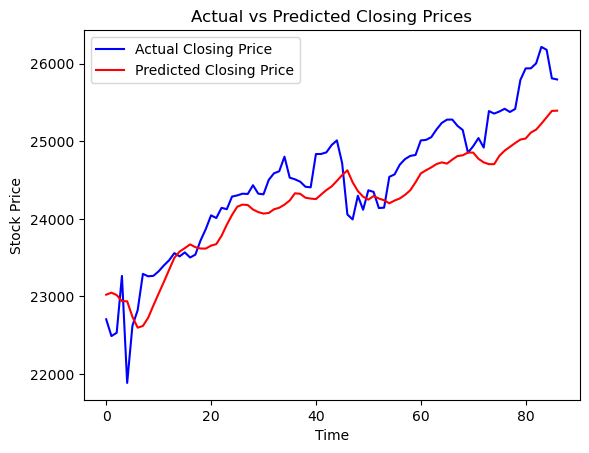

In [29]:
plt.plot(y_test_original, color='blue', label='Actual Closing Price')
plt.plot(y_pred, color='red', label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()